# Opportunity Zones for New Amenities

This notebook identifies which Community Areas show the most potential for new bars and new gyms. It creates undersupply indexes based on the density of relevant amenity types and then uses choropleth maps to visualize the areas that appear most underserved. These maps serve as direct inputs for planning recommendations and discussions.


In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# -----------------------------------------------------------
# 1. Load data and geometry
# -----------------------------------------------------------

df = pd.read_csv("../datasets/saturation_index_by_CA.csv")
df["ca_name"] = df["ca_name"].str.upper().str.strip()

# Load CA boundaries
ca_url = "https://data.cityofchicago.org/resource/igwz-8jzy.geojson"
ca = gpd.read_file(ca_url).to_crs("EPSG:4326")
ca = ca.rename(columns={"area_numbe": "ca_num", "community": "ca_name"})
ca["ca_num"] = ca["ca_num"].astype(int)
ca["ca_name"] = ca["ca_name"].str.upper().str.strip()

# Merge
gdf = ca.merge(df, on=["ca_num", "ca_name"], how="left")

In [3]:
# -----------------------------------------------------------
# 2. Build under supply metrics
# -----------------------------------------------------------

# Bars undersupply: inverse of liquor licenses
gdf["bars_undersupply"] = 1 - gdf["scaled_liquor_license_count"]

# Gyms undersupply:
# You have no explicit gym dataset, so use building permits + business licenses
gdf["gyms_undersupply"] = 1 - (
    0.6 * gdf["scaled_building_permits_count"] +
    0.4 * gdf["scaled_business_license_count"]
)

# Normalize between 0 and 1
gdf["bars_undersupply"] = (gdf["bars_undersupply"] - gdf["bars_undersupply"].min()) / (gdf["bars_undersupply"].max() - gdf["bars_undersupply"].min())
gdf["gyms_undersupply"] = (gdf["gyms_undersupply"] - gdf["gyms_undersupply"].min()) / (gdf["gyms_undersupply"].max() - gdf["gyms_undersupply"].min())



<Figure size 1200x1000 with 0 Axes>

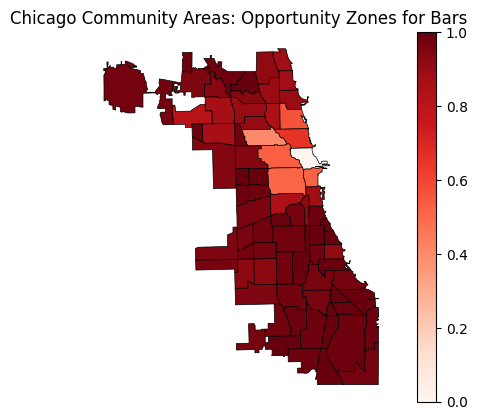

In [7]:
# -----------------------------------------------------------
# 3. Map for bars undersupply
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="bars_undersupply",
    cmap="Reds",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)
plt.title("Chicago Community Areas: Opportunity Zones for Bars ")
plt.axis("off")
plt.show()

<Figure size 1200x1000 with 0 Axes>

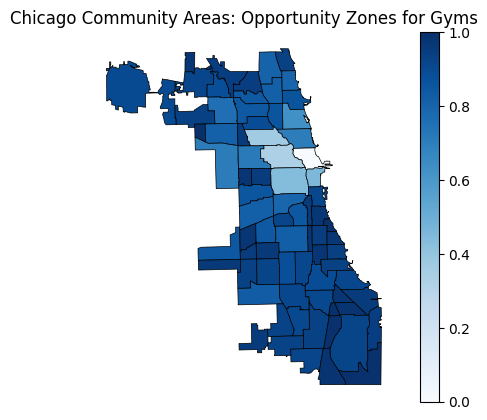

In [6]:
# -----------------------------------------------------------
# 4. Map for gyms undersupply
# -----------------------------------------------------------

plt.figure(figsize=(12, 10))
gdf.plot(
    column="gyms_undersupply",
    cmap="Blues",
    legend=True,
    edgecolor="black",
    linewidth=0.5
)
plt.title("Chicago Community Areas: Opportunity Zones for Gyms")
plt.axis("off")
plt.show()